## Miniestação Meteorológica Arduino e Interação dos Alunos!
### Paulo Henrique Lorenzoni Filho
#### Este notebook contém os dados resultantes da interação dos estudantes da escola Antônio Carneiro Ribeiro com os sensores 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dados1=pd.read_excel("dados.xlsx")
x=dados1['Tempo'][0: :10].astype('str')
t1=dados1['T1'][0: :10]
ur=dados1['UR'][0: :10]
t2=dados1['T2'][0: :10]
lz=dados1['Luz'][0: :10]
p=dados1['Pressao'][0: :10]/100
dados1.describe().round(1)

,T1,UR,Pressao,T2,Altitude,Luz
count,743.0,743.0,743.0,743.0,743.0,743.0
mean,19.6,72.3,95698.6,19.8,481.6,128.8
std,1.1,6.8,10.5,3.2,76.5,94.3
min,18.0,63.0,95679.0,-61.6,476.0,9.8
25%,19.0,68.0,95691.0,19.3,478.0,44.0
50%,20.0,71.0,95697.0,20.0,479.0,145.5
75%,20.0,74.5,95705.0,20.4,480.0,186.0
max,23.0,93.0,95727.0,23.2,2565.0,960.0


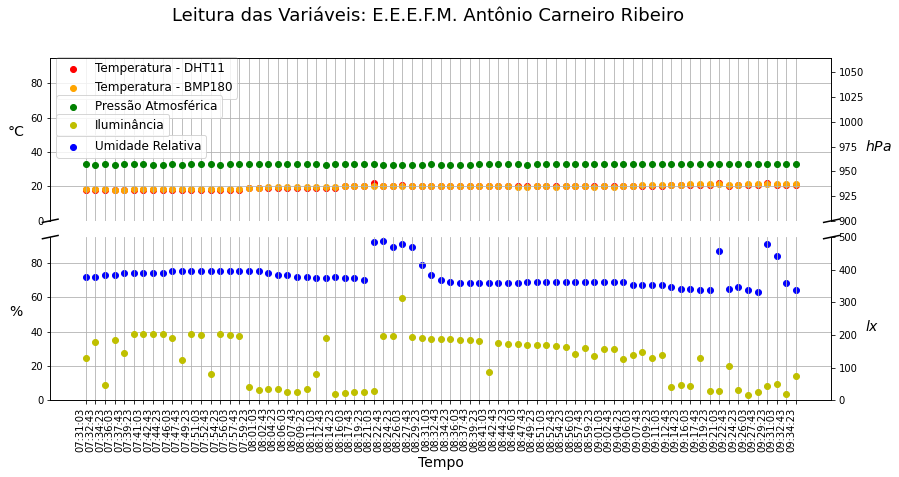

In [3]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(14, 7))
fig.subplots_adjust(hspace=0.1)

ax3 = ax1.twinx()
ax4 = ax2.twinx()

# set limits for left y-axis
ax1.set_ylim(0,50, 5)
ax2.set_ylim(0 ,95)
# set limits for right y-axis (twinned)
ax3.set_ylim(900, 1065) #direita superior
ax4.set_ylim(0, 500) #direita inferior

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax4.spines['top'].set_visible(False)

ax1.tick_params(bottom=False)
ax2.tick_params(bottom=True)

# plotting break diagonals
d = 0.01  # line length 
ax1.plot((-d, +d), (-d, +d), c='k', clip_on=False, transform=ax1.transAxes)
ax1.plot((1 - d, 1 + d), (-d, +d), c='k', clip_on=False, transform=ax1.transAxes)
ax2.plot((-d, +d), (1 - d, (1 + d)), c='k', clip_on=False, transform=ax2.transAxes)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), c='k', clip_on=False, transform=ax2.transAxes)

ax1.set_ylabel('°C',fontsize=14,rotation=0, labelpad=15)
ax2.set_ylabel('%',fontsize=14,rotation=0, labelpad=15)
ax3.set_ylabel('$hPa$',fontsize=14, rotation=0, labelpad=15)
ax4.set_ylabel('$lx$',fontsize=14, rotation=0, labelpad=15)
ax2.set_xlabel('Tempo',fontsize=14)
plt.suptitle('Leitura das Variáveis: E.E.E.F.M. Antônio Carneiro Ribeiro',fontsize=18)
fig.autofmt_xdate(rotation=90)
ax1.grid(True)
ax2.grid(True)

ax1.scatter(x, t1, label='Temperatura - DHT11', color='r')
ax1.scatter (x, t2, label="Temperatura - BMP180", color='orange' )

ax2.scatter(x, ur, label='Umidade Relativa', color='b')

ax3.scatter(x, p, c='g', label='Pressão Atmosférica')

ax4.scatter(x, lz, label='Iluminância', color='y')

#ax1.text(8, 81, 'Manhã', style='italic',fontsize=13)
#ax1.text(35, 81, 'Tarde', style='italic',fontsize=13)        
#ax1.text(60, 81, 'Entardecer', style='italic',fontsize=13)

#ax1.vlines(x=23, ymin=0, ymax=80)
#ax2.vlines(x=23,ymin=0, ymax=80)
#ax1.vlines(x=47,ymin=0, ymax=80)
#ax2.vlines(x=47, ymin=0, ymax=80)
ax1.legend(loc=2,fontsize=12, bbox_to_anchor=(0,1.04))
ax2.legend(loc=3,bbox_to_anchor=(0,1.45),fontsize=12)
ax3.legend(loc='center left',bbox_to_anchor=(0,0.7),fontsize=12)
ax4.legend(loc=3,bbox_to_anchor=(0,1.58) , fontsize=12)
plt.savefig('E1.png', dpi=300);